In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

2025-07-03 09:40:50.532358: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751535650.743831      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751535650.806037      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load dữ liệu ảnh
def load_data(data_dir, img_size=224):
    X, y = [], []
    for label, folder in enumerate(['without_mask', 'with_mask']):
        path = os.path.join(data_dir, folder)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            y.append(label)
    return np.array(X), np.array(y)

# Load data
X, y = load_data('/kaggle/input/face-mask-dataset/data', img_size=224)
X = X / 255.0  # chuẩn hóa
y = np.array(y)



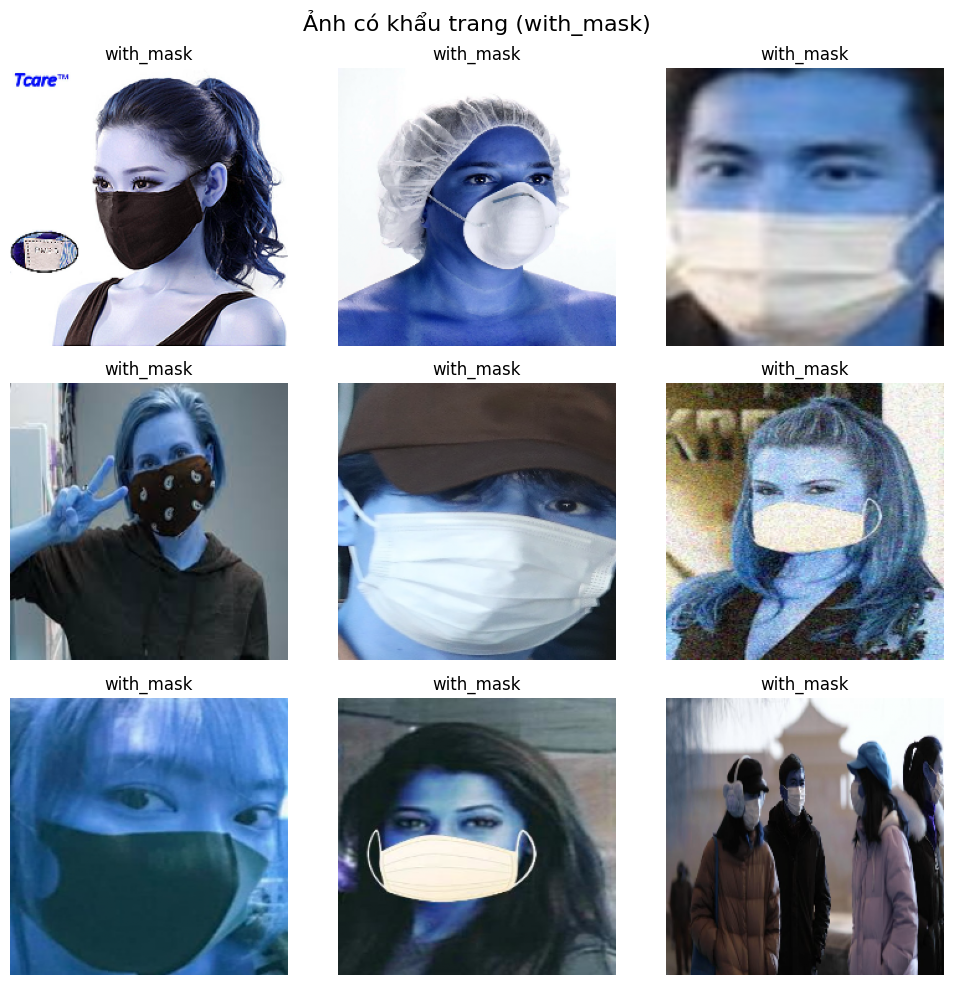

In [3]:
import matplotlib.pyplot as plt

class_names = ['without_mask', 'with_mask']

with_mask_indices = [i for i in range(len(y)) if y[i] == 1]

plt.figure(figsize=(10, 10))
for i in range(9):
    idx = with_mask_indices[i]
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[idx])
    plt.title(class_names[y[idx]])
    plt.axis('off')
plt.suptitle("Ảnh có khẩu trang (with_mask)", fontsize=16)
plt.tight_layout()
plt.show()


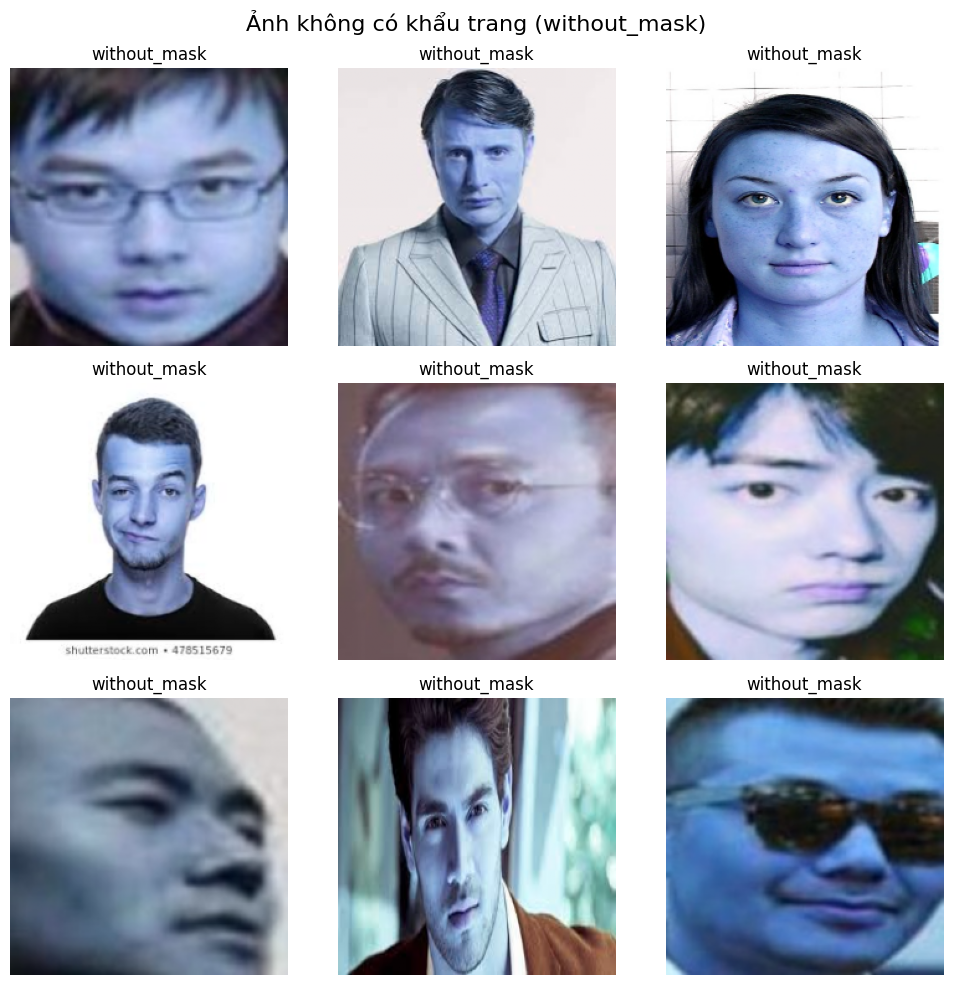

In [4]:
without_mask_indices = [i for i in range(len(y)) if y[i] == 0]

plt.figure(figsize=(10, 10))
for i in range(9):
    idx = without_mask_indices[i]
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[idx])
    plt.title(class_names[y[idx]])
    plt.axis('off')
plt.suptitle("Ảnh không có khẩu trang (without_mask)", fontsize=16)
plt.tight_layout()
plt.show()


In [7]:
X[1]

array([[[0.91372549, 0.89019608, 0.89411765],
        [0.91372549, 0.89019608, 0.89411765],
        [0.91372549, 0.89019608, 0.89411765],
        ...,
        [0.94901961, 0.9254902 , 0.92941176],
        [0.94901961, 0.9254902 , 0.92941176],
        [0.94509804, 0.92156863, 0.9254902 ]],

       [[0.91372549, 0.89019608, 0.89411765],
        [0.91372549, 0.89019608, 0.89411765],
        [0.91372549, 0.89019608, 0.89411765],
        ...,
        [0.94901961, 0.9254902 , 0.92941176],
        [0.94901961, 0.9254902 , 0.92941176],
        [0.94509804, 0.92156863, 0.9254902 ]],

       [[0.91372549, 0.89019608, 0.89411765],
        [0.91372549, 0.89019608, 0.89411765],
        [0.91372549, 0.89019608, 0.89411765],
        ...,
        [0.94901961, 0.9254902 , 0.92941176],
        [0.94901961, 0.9254902 , 0.92941176],
        [0.94509804, 0.92156863, 0.9254902 ]],

       ...,

       [[0.43137255, 0.49411765, 0.55686275],
        [0.42745098, 0.49019608, 0.55294118],
        [0.5254902 , 0

In [8]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


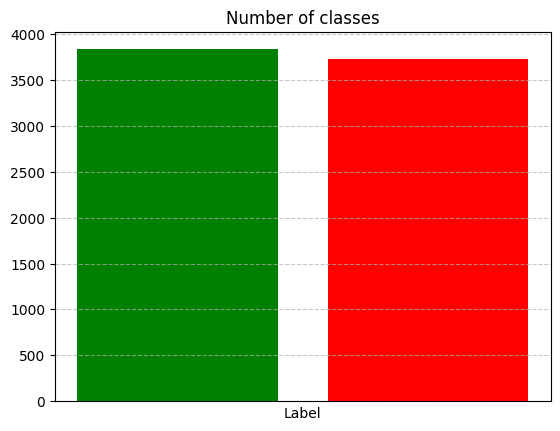

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

y_series = pd.Series(y)             
counts = y_series.value_counts()   

# Vẽ biểu đồ cột
plt.bar(counts.index, counts.values, color=['green', 'red'])
plt.title('Number of classes')
plt.xlabel('Label')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([])
plt.show()


In [11]:
# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Tăng cường dữ liệu
datagen = ImageDataGenerator(rotation_range=15, zoom_range=0.2, horizontal_flip=True)
datagen.fit(X_train)

In [12]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [13]:
# Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1751535841.892880      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751535841.893632      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện
model.fit(datagen.flow(X_train, y_train, batch_size=32), 
          validation_data = (X_test, y_test), 
          epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1751535902.137075     100 service.cc:148] XLA service 0x78872c0046d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751535902.138009     100 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1751535902.138038     100 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1751535902.511629     100 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/189 ━━━━━━━━━━━━━━━━━━━━ 27:22 9s/step - accuracy: 0.5312 - loss: 0.7021

I0000 00:00:1751535907.869488     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


189/189 ━━━━━━━━━━━━━━━━━━━━ 81s 384ms/step - accuracy: 0.7302 - loss: 0.6266 - val_accuracy: 0.8934 - val_loss: 0.2536
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 63s 334ms/step - accuracy: 0.8899 - loss: 0.2809 - val_accuracy: 0.9100 - val_loss: 0.2171
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 63s 334ms/step - accuracy: 0.9019 - loss: 0.2547 - val_accuracy: 0.9166 - val_loss: 0.2245
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 62s 329ms/step - accuracy: 0.9159 - loss: 0.2198 - val_accuracy: 0.9186 - val_loss: 0.2021
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 63s 334ms/step - accuracy: 0.9143 - loss: 0.2193 - val_accuracy: 0.9298 - val_loss: 0.1652
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 63s 331ms/step - accuracy: 0.9300 - loss: 0.1829 - val_accuracy: 0.9338 - val_loss: 0.1654
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 62s 330ms/step - accuracy: 0.9271 - loss: 0.1835 - val_accuracy: 0.9239 - val_loss: 0.1765
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 63s 335ms/step - accuracy: 0.9401 - loss: 0.1550 - val

In [ ]:
model.save('mask_detector.h5')


In [15]:
model.evaluate(X_test, y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9371 - loss: 0.1727


[0.14707617461681366, 0.9457312822341919]